In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Original data is separated by delimiter ";" in given data set, so we have to specify that when loading our data.

df = pd.read_csv('/Users/fernandes/Desktop/Data_Stream/data/winequality-white.csv', sep=';')


In [4]:
# quick look at our data

df.head(20)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [5]:
# Dataset comprises of 4898 observations and 12 characteristics.
# There is one dependent variable and rest 11 are independent variables — they are physico-chemical characteristics.

df.shape




(4898, 12)

In [6]:
# check labels for each column

df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [7]:
# Data has only float and integer values
# No variable column has null/missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
# SUMMARY STATISTICS

df.describe()

# """
# Key Observations

# 1. Mean value is more than median value of each column represented by 50% (50th percentile) in index column.
# 2. Large differnece in 75th %tile and max values of predictors "residual sugar","free sulfur dioxide","total sulfur dioxide"

# CONCLUSION: observations 1 and 2 suggests that there are extreme *values-Outliers* in our dataset!
# """

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


std is a measure of how far away the data points are from the mean value - measures the spread of the data. the smaller the std the smaller the spread in the data

In [10]:
df.quality.unique()

# """
# QUALITY column

# 1. Target variable (dependent) variable is discrete and categorical in nature.
# 2. "quality" score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
# 3. 1,2 & 10 Quality ratings are not given by any obseravtion.Only scores obtained are between 3 to 9.

# """

array([6, 5, 7, 8, 4, 3, 9])

In [11]:
df.quality.value_counts()


# """
# OBSERVATIONS

# 1. "quality" has most values concentrated in the categories 5, 6 and 7.
# 2. Only a few observations made for the categories 3 & 9

# """

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

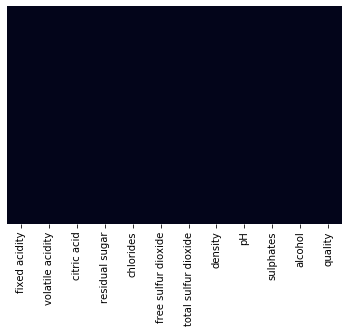

In [12]:
# checking for missing values with the help of visualization

sns.heatmap(df.isnull(),cbar=False,yticklabels=False)


# """
# EXPLANATION

# Dataset has no missing values. 
# (If there were any, you would've noticed in figure represented by different colour shade on purple background.)

# """

In [13]:
# calculate attributes correlation

df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


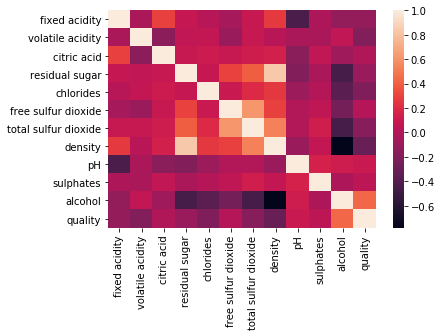

In [14]:
# build correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=False) 

# """
# Light shades represents positive correlation while darker shades represents negative correlation.

# """

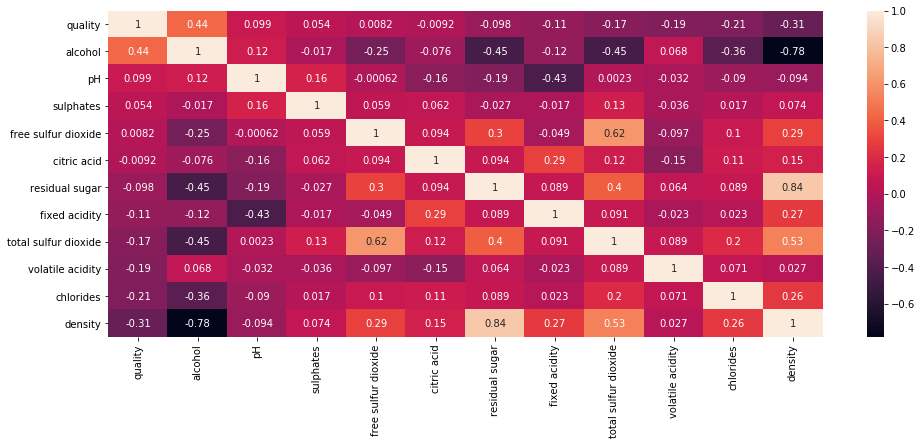

In [15]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))


#Quality correlation matrix

k = 12  # number of variables for heatmap
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()

sns.heatmap(cm, annot=True)

# """
# OBSERVATIONS

# 1."density" has strong positive correlation with "residual sugar" 
# 2. "density" has a strong negative correlation with "alcohol".
# 3. "free sulphur dioxide" and "citric acid" has almost no correlation with "quality"!
# (we can infer there is no linear relationship between these two predictors.)

# """


## BOX PLOT

 - A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.
- The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
>- The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the >five number summary:
>    - Minimum
>    - First quartile
>    - Median
>    - Third quartile
>    - Maximum.

- In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).
- A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

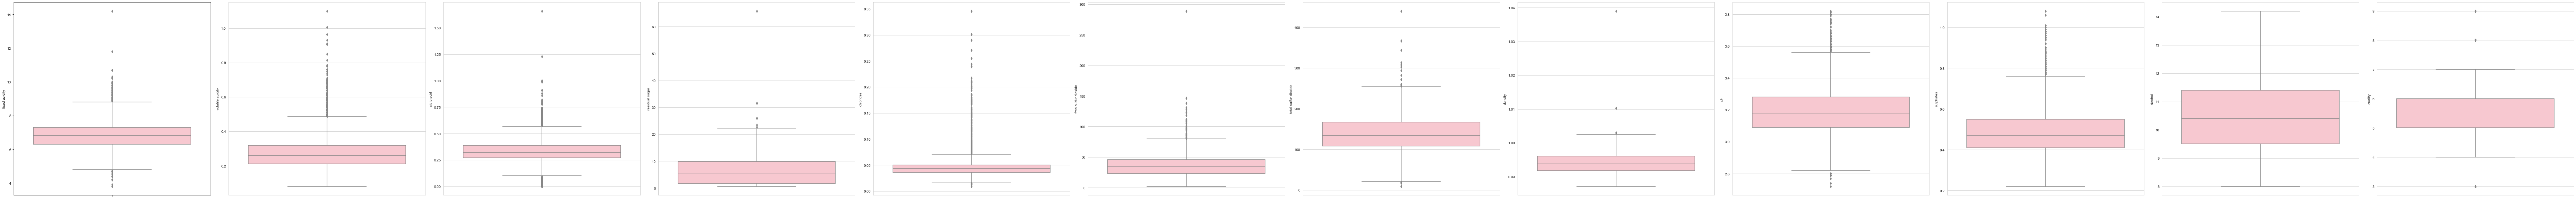

In [16]:
import warnings
warnings.filterwarnings('ignore')

# CHECKING FOR OUTLIERS

l = df.columns.values
number_of_columns=12
number_of_rows = 12

# let's build a boxplot
plt.figure(figsize=(100,100))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x = df[l[i]],color='pink',orient='v')
    plt.tight_layout()
    
# """
# OBSERVATION

# 1. Except "alcohol" all other features columns shows outliers. 

# * Outliers are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile.

# """


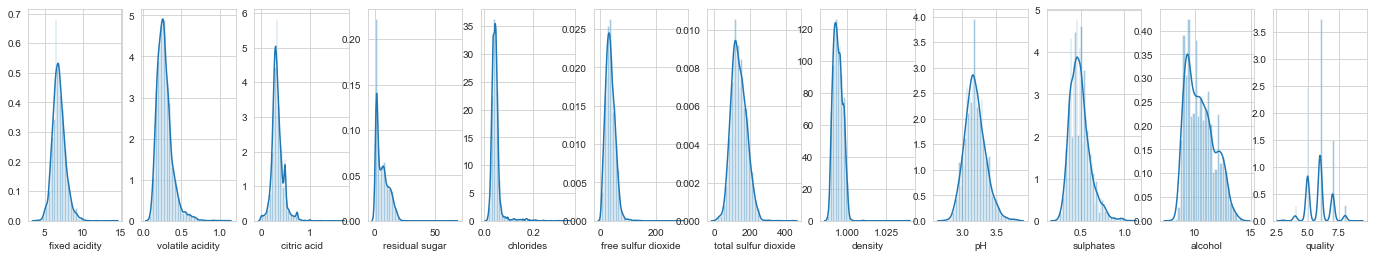

In [17]:
# check distribution-skewness

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 
    
# """
# * Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution 
# to check the linearity of the variables.
# (more info: https://en.wikipedia.org/wiki/Kernel_density_estimation)

# OBSERVATIONS

# 1. “pH” column appears to be normally distributed
# 2. remaining all independent variables are right skewed/positively skewed. Links back to median being less than mean.
# """

## DO YOU AGREE?


<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis is a philosophical approach, which is open to interpretation.</b> 
</div>
